# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-04 10:59:04.393829: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 10:59:04.396374: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 10:59:04.427998: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 10:59:05.128004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=16, layers=2, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 12,960 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=4)


Epoch 1/4: accuracy 100.000%
Epoch 2/4: accuracy 0.000%
Epoch 3/4: accuracy 0.000%
Epoch 4/4: accuracy 0.000%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[ 8  8  7 ...  7 -7 -7]
 [-5 -8 -8 ... -5 -6  6]] ...

 [[ 7 -8  7  6  8  8 -6 -7  6 -7  8 -7 -7  7 -8  7]
 [ 8 -8  7 -8 -5 -8 -6 -8 -7 -8 -8 -7 -8  7 -8 -7]
 [ 8 -7 -8  8  7 -8 -5  5 -8 -5 -7  7 -7  8  7  7]
 [-8  8 -8  8  7 -7 -7  8  8  5 -7 -7  7  8 -8 -8]
 [ 5 -7 -8  6 -7 -6 -8 -8  5  5  6  7 -8 -8 -6  5]
 [-7 -7  7  8 -6 -5  8  7  8 -8  7 -7 -7  8 -7 -7]
 [-6  7  7  6  8 -8 -8 -7  5  8 -8  7  8 -8  7  8]
 [-7 -7 -5  5  8 -8 -8  8  8  7  5  7 -8  7 -6  8]
 [-8 -8 -8 -6 -7 -6  6 -8  5  8 -6 -8 -8  8 -7  6]
 [ 7  8  7  7 -7 -6  7 -8  8  8 -5  5  6 -8 -7 -7]
 [ 5  7  8  8 -7 -6  7  7  8 -6 -7 -8  8 -6 -8 -8]
 [ 7 -8 -7 -7  8 -7 -5 -5 -7 -8  7  7 -7 -7 -7 -7]
 [-5  5 -5  7  7  8  6 -8  5 -6 -8 -8 -8 -6  8  5]
 [ 7 -8 -5 -6 -7 -6 -7 -6  8 -5  8  5 -7 -8 -8 -7]
 [-7 -7  8  5  8  6  7 -8 -8  8  8  5 -7 -5  5 -7]
 [ 7 -7 -7  8 -8  8  8  7 -8  8 -5  5  8 -7  7 -7]]

 [[-8  7  7 -8 -5  6  7 -7  8  7  8  7 -8  6  7 -8]
 [-7  6  8  7  7  5  8  8 -7 -8 -6  7  7 -8  8  5]] ...



 [0 0 0 0 0 0 0 0 0 0]


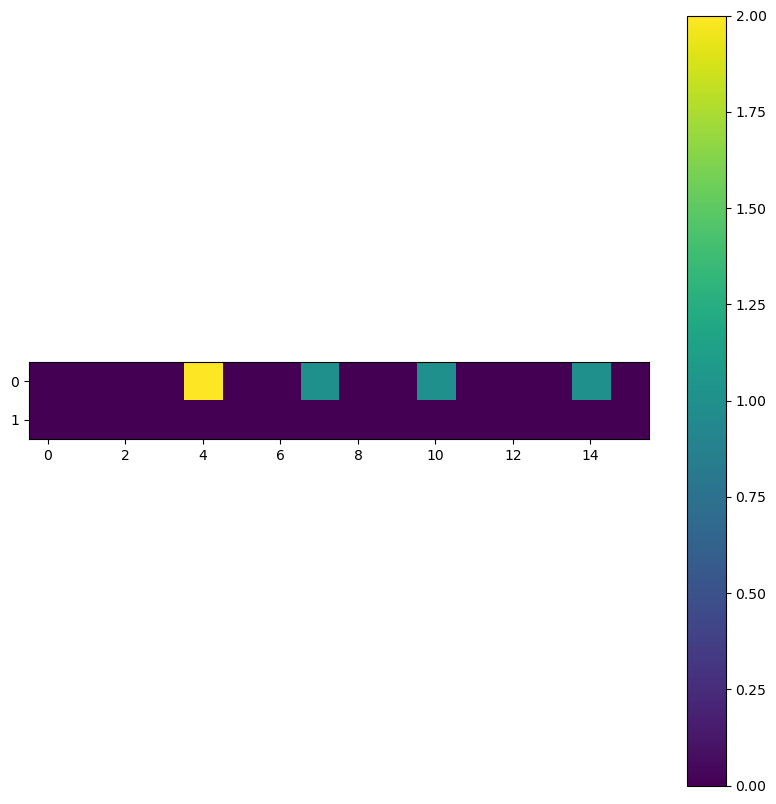

In [9]:
plt.figure(figsize = (20,10))
plt.colorbar()
plt.imshow(model.last_intermediate_outputs)
print("\n", model.last_outputs)